# Gray-Scott Model for Coarse-Grained Reaction-Diffusion

In this Jupyter notebook, we will be simulating a Turing pattern generator, called the Gray-Scott Reaction-Diffusion model. Gray-Scott model is a model that has only two variables: a prey and a predator. Predator eats the prey to multiply and prey is present in the environment constantly.

**NOTE**: You will need to place this file on the same level as another folder named "*/gs_images*". ImageIO will not always create this folder automatically, so it may need to be created manually.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import signal
import imageio

%matplotlib inline

'''
Simulate function
Description: Simulate the Gray-Scott model for numIter iterations.
Inputs:
    - numIter:  number of iterations
    - A:        prey matrix
    - B:        predator matrix
    - f:        feed rate
    - k:        kill rate
    - dt:       time constant
    - dA:       prey diffusion constant
    - dB:       predator diffusion constant
    - lapl:     3 x 3 Laplacian matrix to calculate diffusion

Outputs:
    - A_matrices:   Prey matrices over the course of the simulation
    - B_matrices:   Predator matrices over the course of the simulation
'''


'\nSimulate function\nDescription: Simulate the Gray-Scott model for numIter iterations.\nInputs:\n    - numIter:  number of iterations\n    - A:        prey matrix\n    - B:        predator matrix\n    - f:        feed rate\n    - k:        kill rate\n    - dt:       time constant\n    - dA:       prey diffusion constant\n    - dB:       predator diffusion constant\n    - lapl:     3 x 3 Laplacian matrix to calculate diffusion\n\nOutputs:\n    - A_matrices:   Prey matrices over the course of the simulation\n    - B_matrices:   Predator matrices over the course of the simulation\n'

The Simulate function will take in the same parameters as the Diffuse function from the diffusion tutorial, but it will also take parameters f and k corresponding to the Gray-Scott feed and kill parameters, respectively. The simulation is in fact very similar to the diffusion notebook except for a very slight change that we make by adding the feed, kill, and predator-prey reactions when we update the matrices A and B containing the concentrations of the two particles over all the cells in the grid.

In [2]:

images = []

def simulate(numIter, A, B, f, k, dt, dA, dB, lapl, plot_iter, filename):
    print("Running Simulation")
    start = time.time()

    # Run the simulation
    for iter in range(numIter):
        A_new = A + (dA * signal.convolve2d(A, lapl, mode='same', boundary='fill', fillvalue=0) - (A * B * B) + (f * (1-A))) * dt
        B_new = B + (dB * signal.convolve2d(B, lapl, mode='same', boundary='fill', fillvalue=0) + (A * B * B) - (k * B)) * dt
        A = np.copy(A_new)
        B = np.copy(B_new)
        if (iter % plot_iter is 0):
            plt.clf()
            plt.imshow((B / (A+B)),cmap='Spectral')
            plt.axis('off')
            now = time.time()
            name = filename+str(iter)+'.png'
            plt.savefig(name)
            images.append(imageio.imread(name))
    
    return A, B

In [3]:
# _*_*_*_*_*_*_*_*_* GRID PROPERTIES *_*_*_*_*_*_*_*_*_*
grid_size = 101 # Needs to be odd
numIter = 5000;
seed_size = 11 # Needs to be an odd number
A = np.ones((grid_size,grid_size))
B = np.zeros((grid_size,grid_size))

# Seed the predators
B[int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1, \
int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1] = \
np.ones((seed_size,seed_size))

Running Simulation


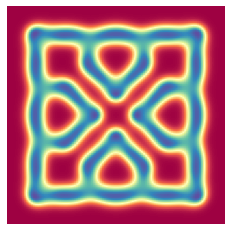

In [4]:
# _*_*_*_*_*_*_*_*_* SIMULATION VARIABLES *_*_*_*_*_*_*_*_*_*

f = 0.055
k = 0.117
dt = 1.0
dA = 1.0
dB = 0.5
lapl = np.array([[0.05, 0.2, 0.05],[0.2, -1.0, 0.2],[0.05, 0.2, 0.05]])
plot_iter = 50

filename = 'gs_images/f55_k117'
simulate(numIter, A, B, f, k, dt, dA, dB, lapl, plot_iter, filename)
imageio.mimsave(filename+'.gif', images)